<a href="https://colab.research.google.com/github/asir928/IDS/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Asir Nayeef

# Project 3

1. Import data
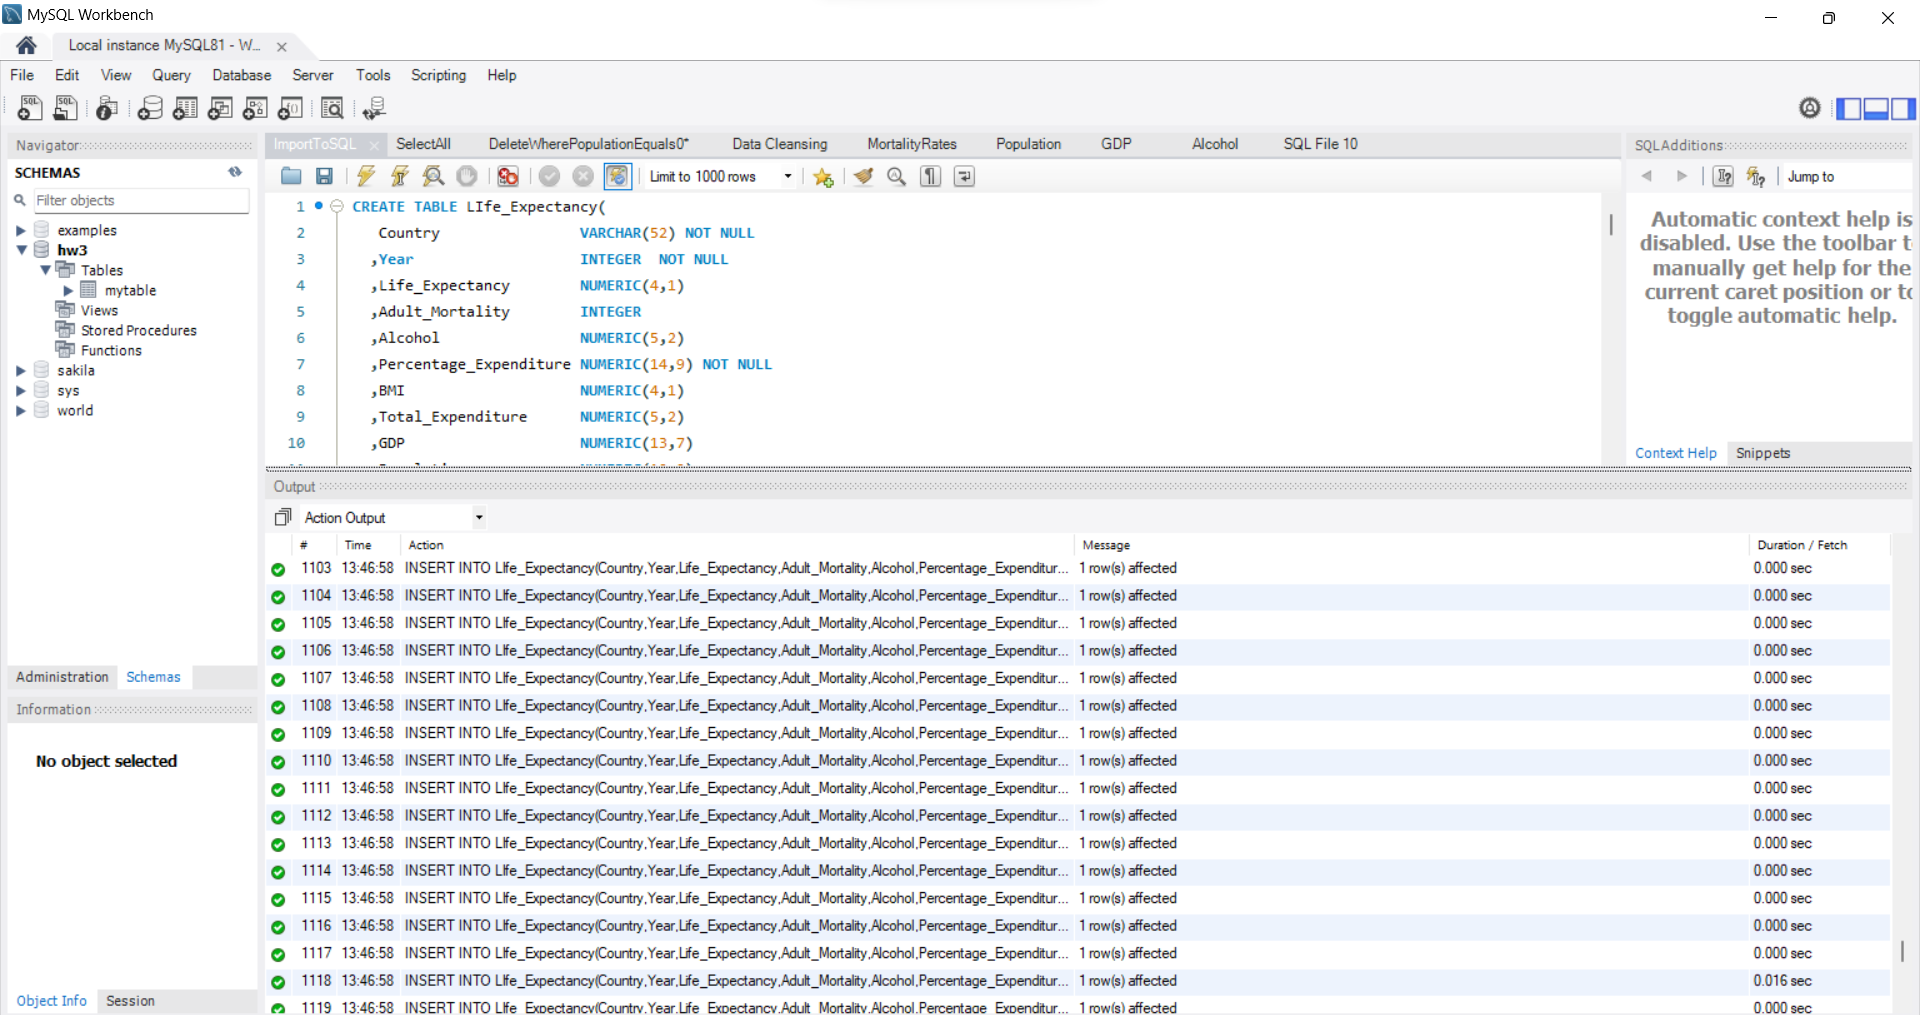

2. Data Cleansing
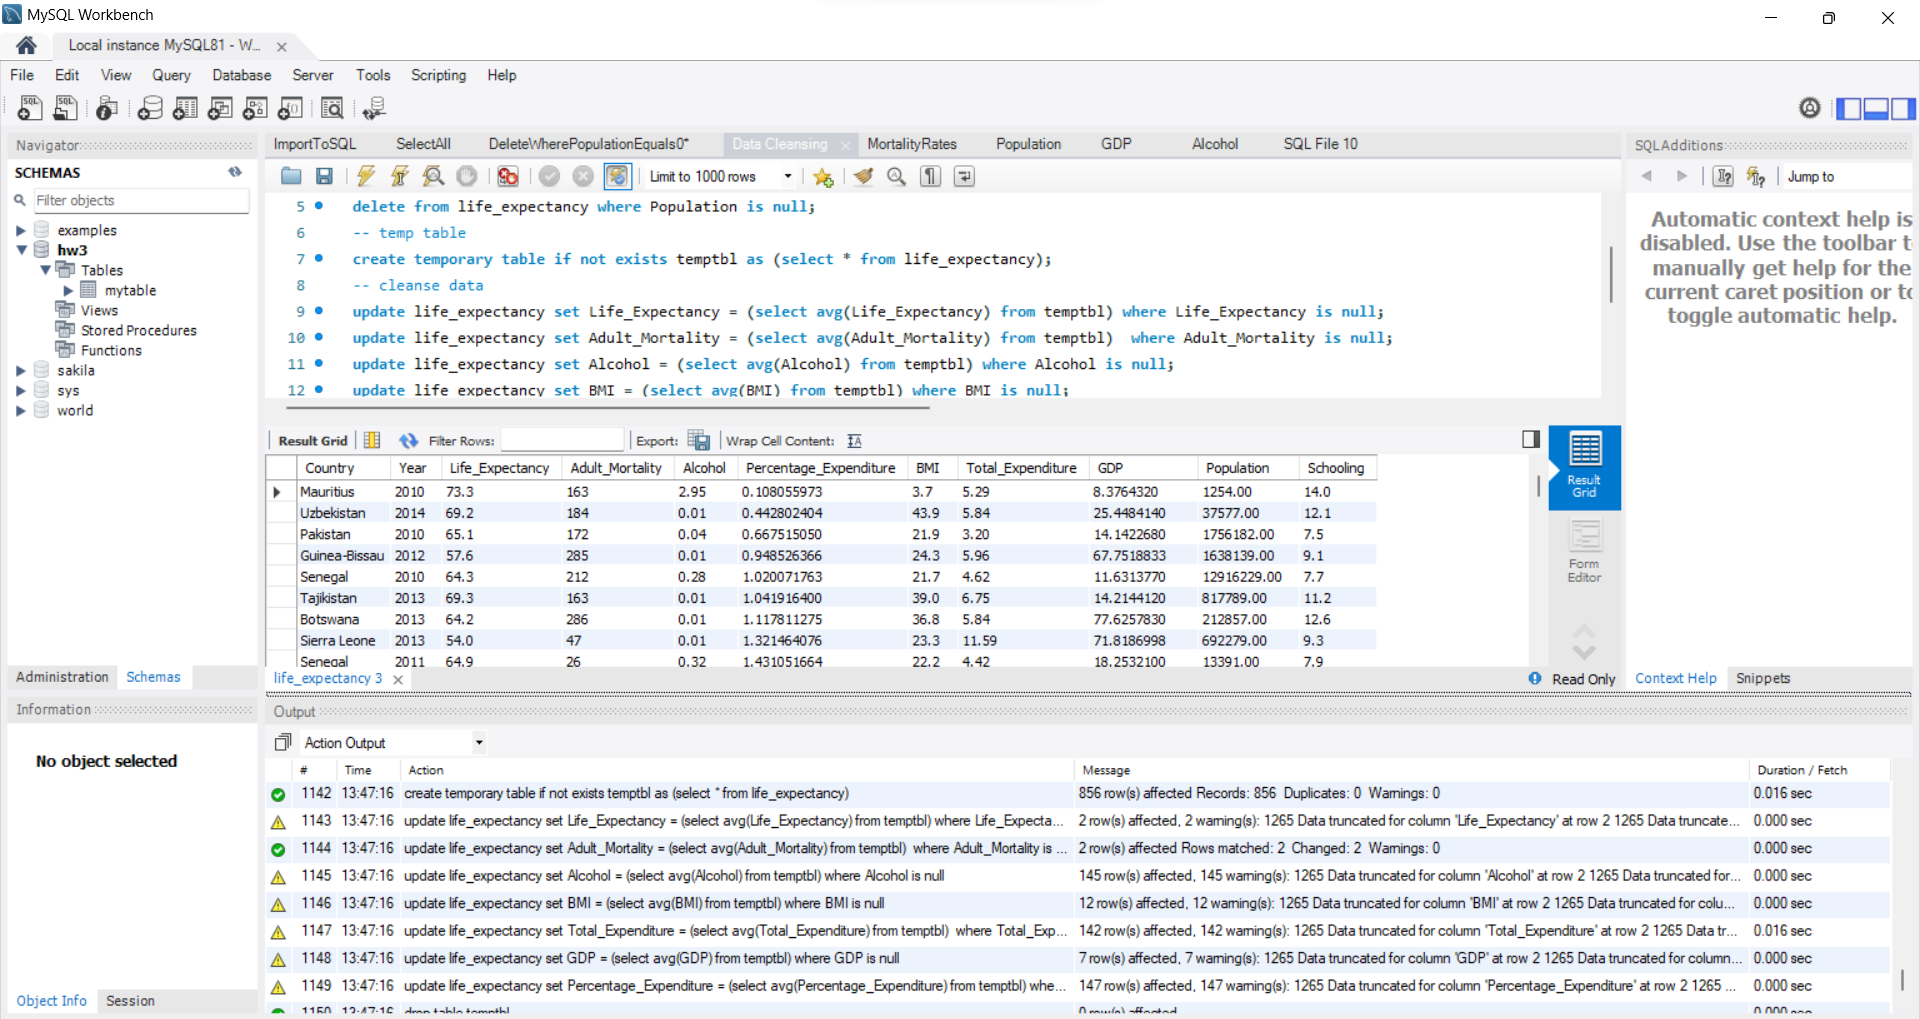

3. Count number of countries.
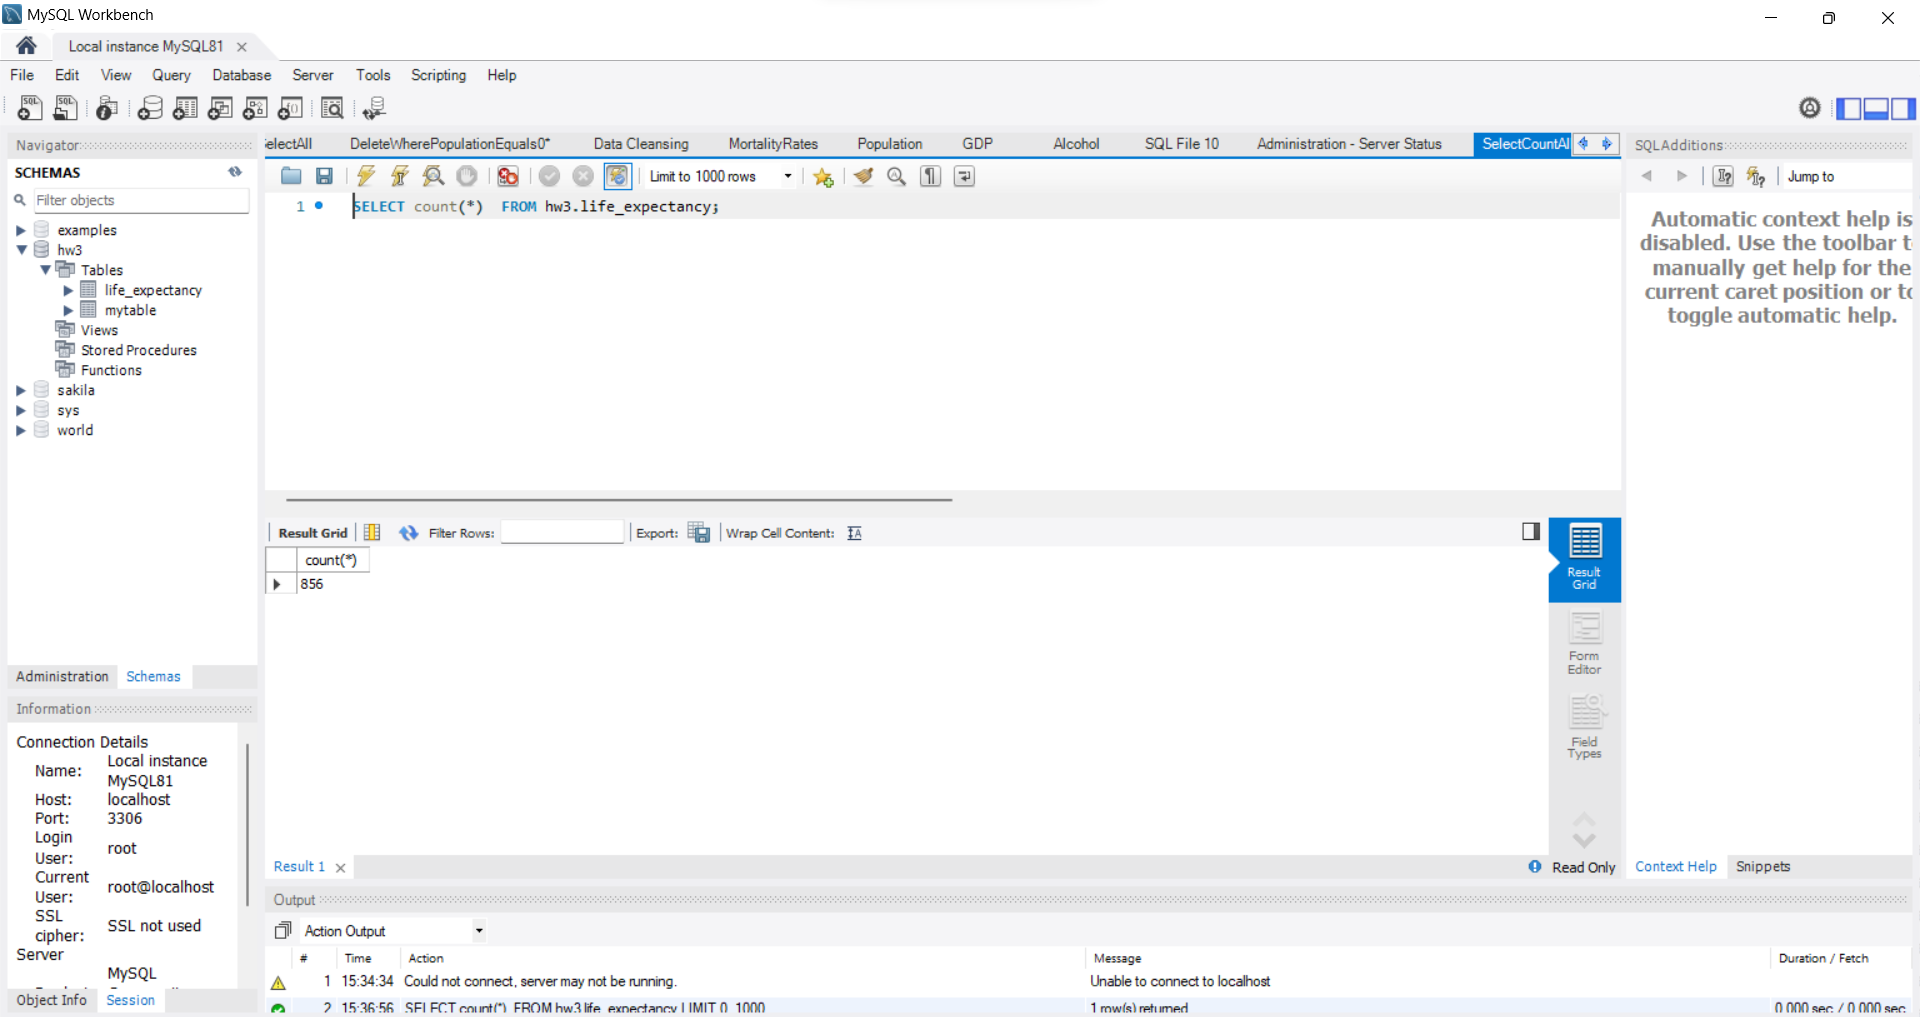

4. Highest/lowest mortality rates (2010-2015)

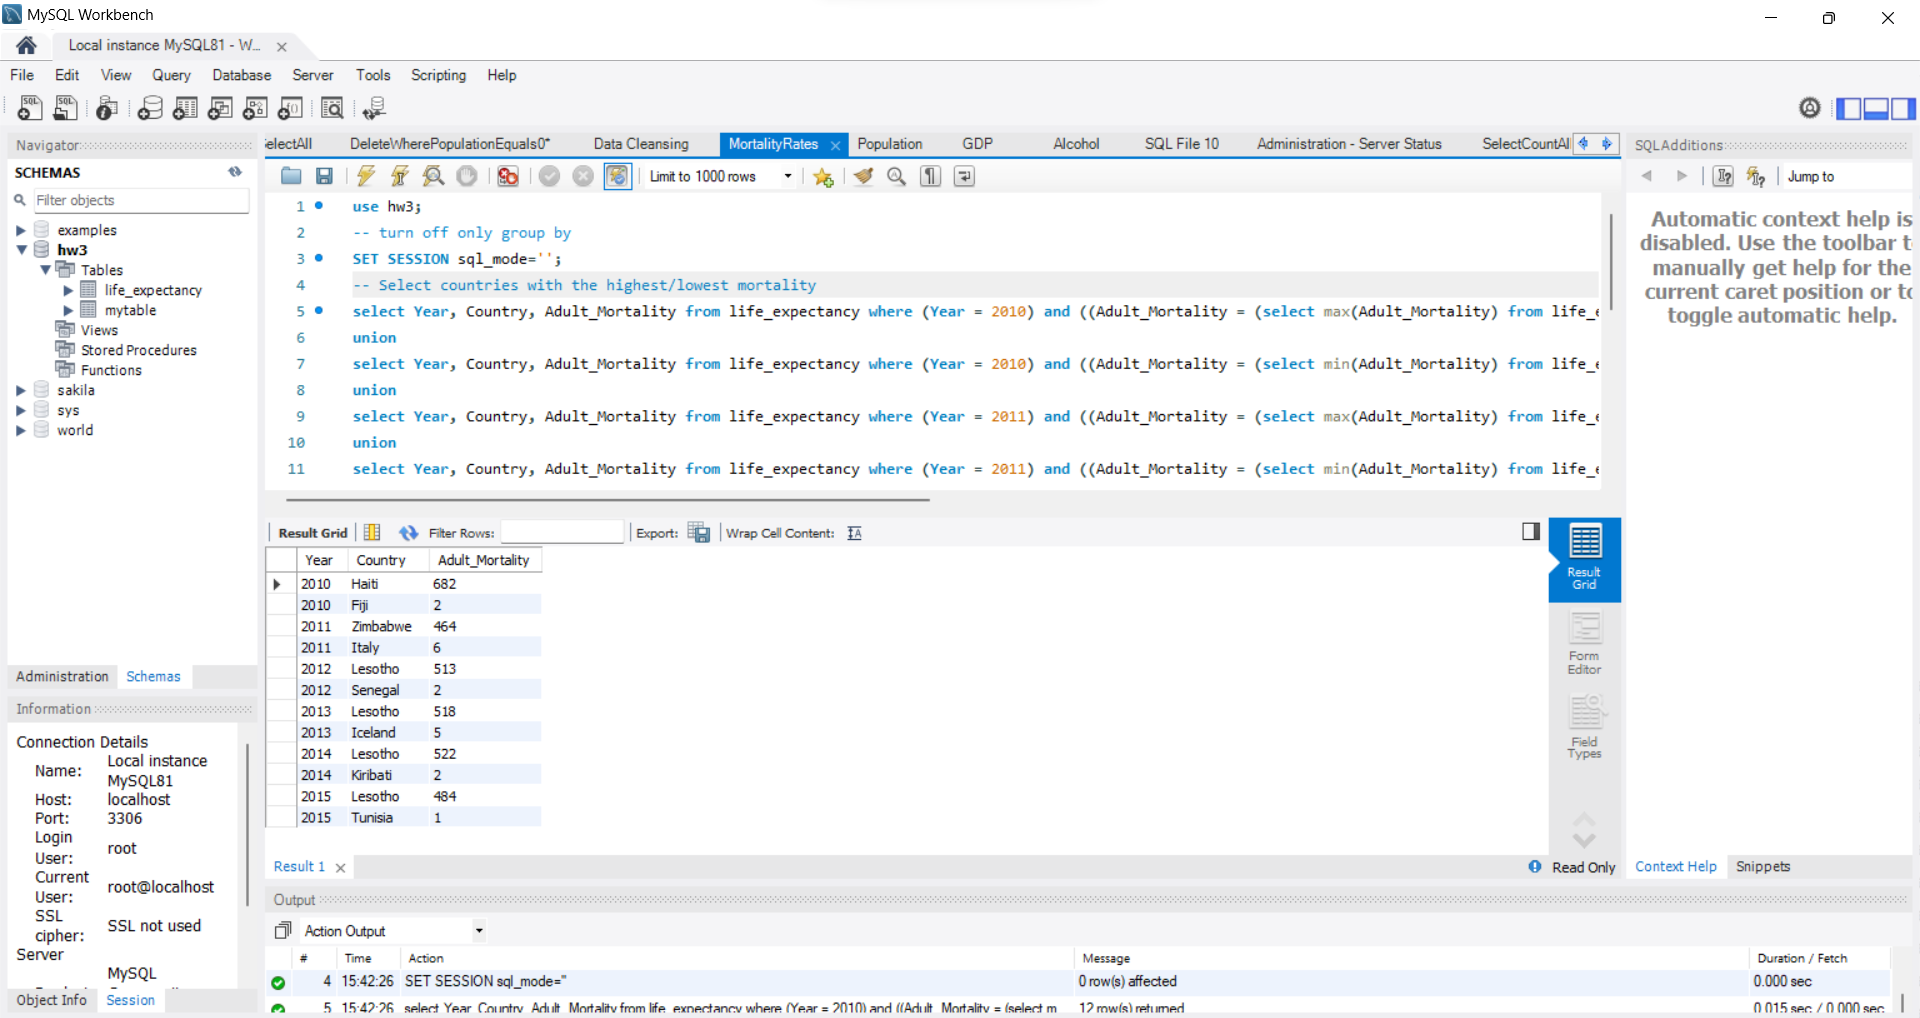


5. Highest/lowest populations (2010-2015)

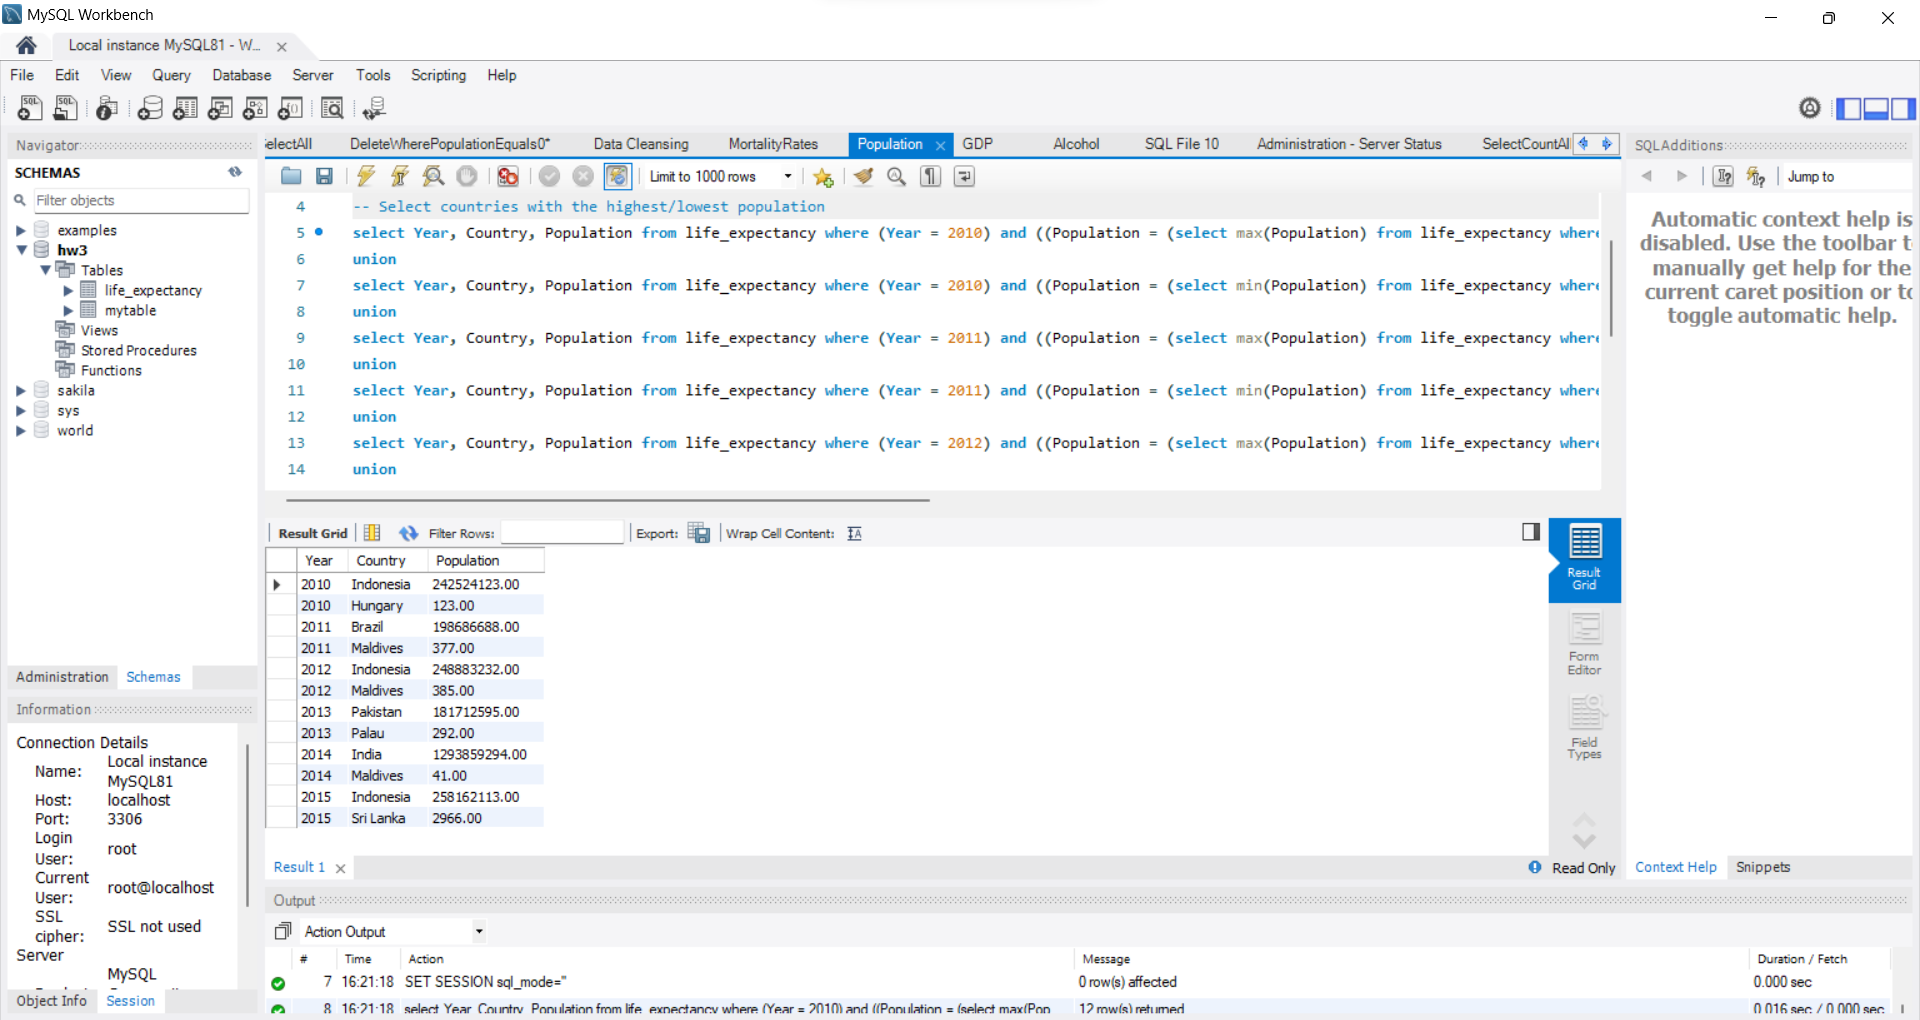


6. Highest/lowest GDP (2010-2015)

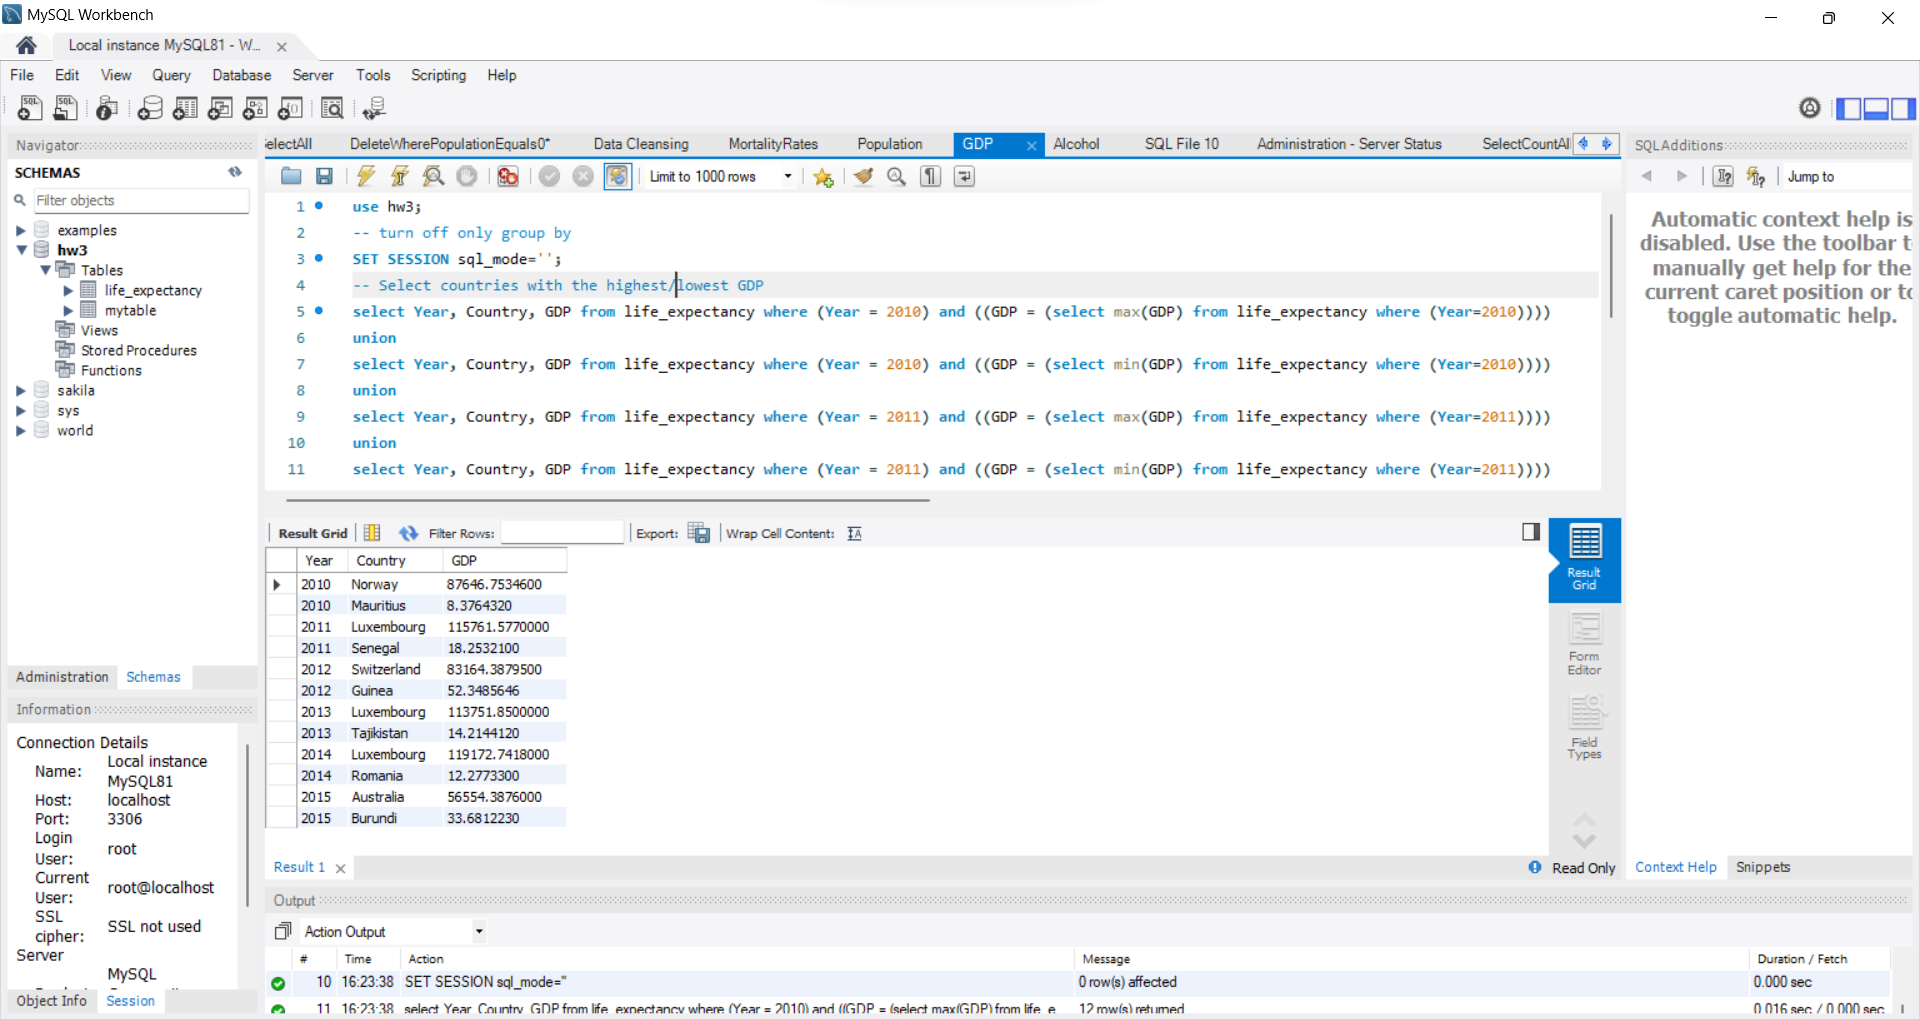

7. Highest/lowest alcohol consumption (2010-2015)

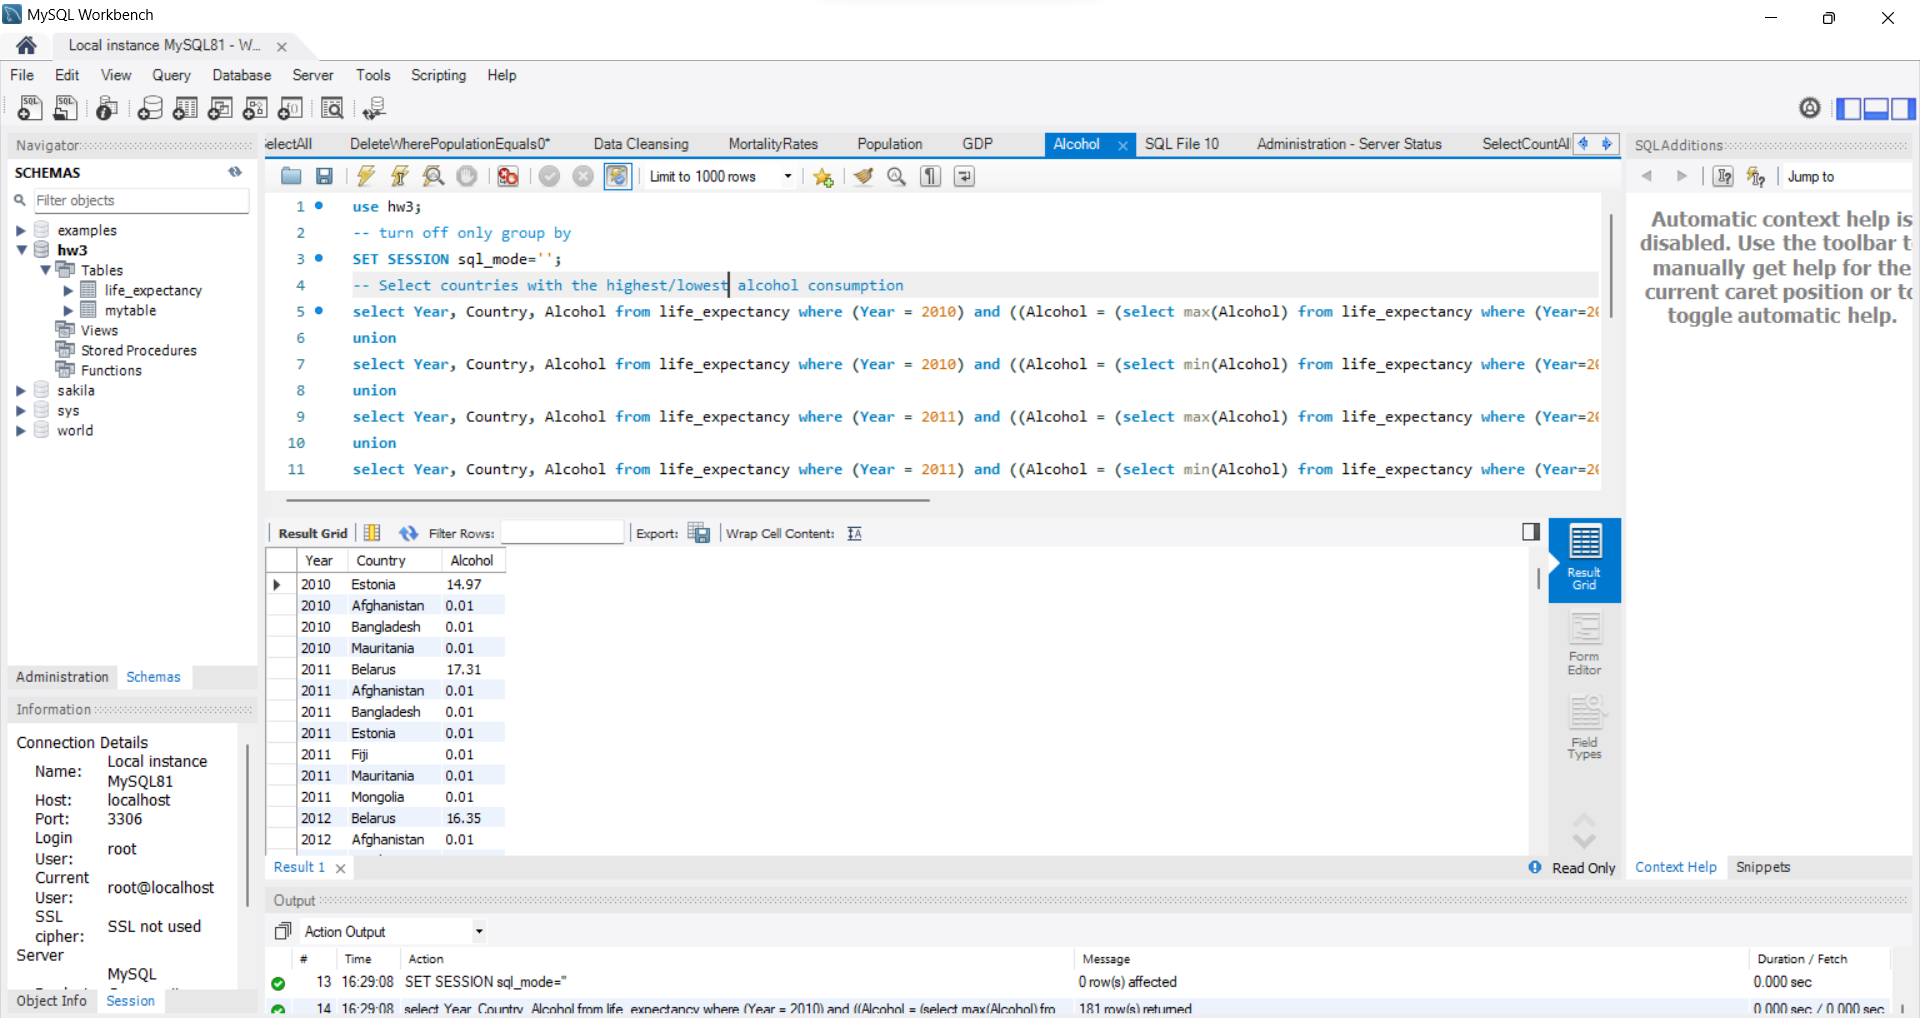


8. Do densely populated countries tend to have lower life expectancy?

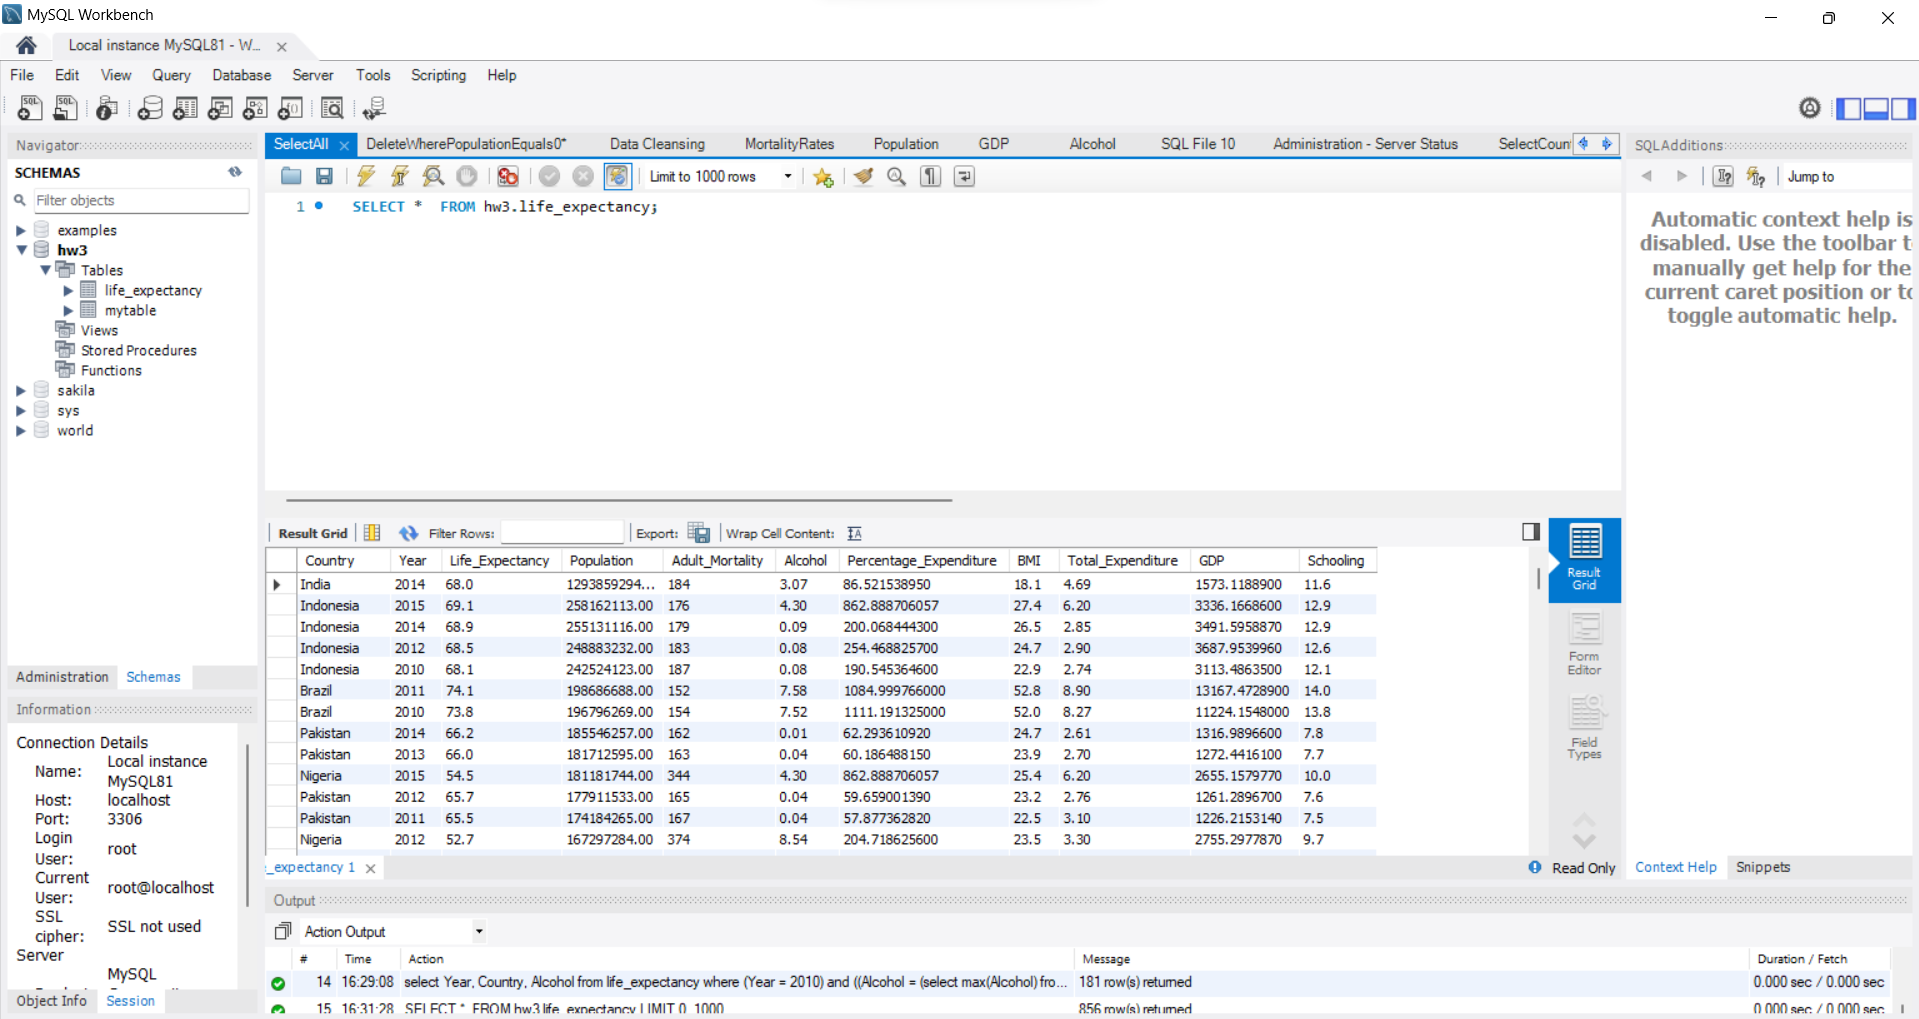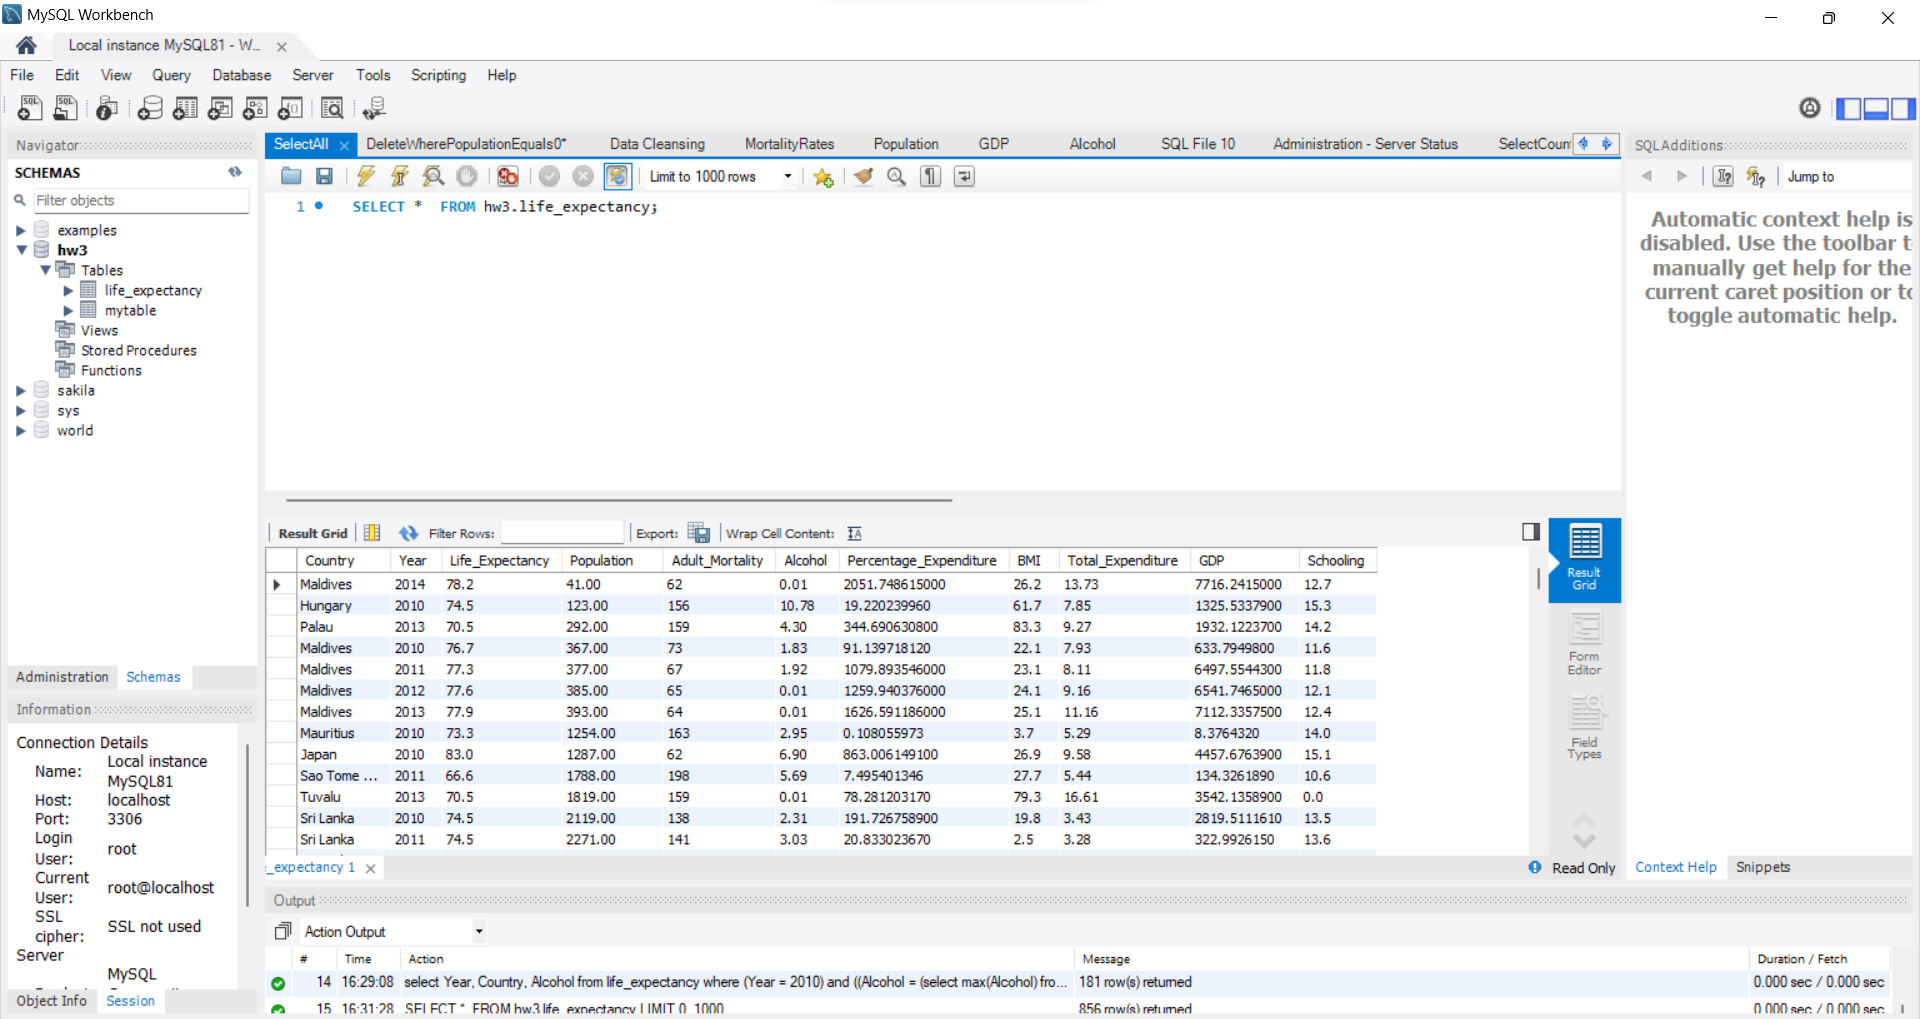

The more dense locations seem to have less  life expectancy compared to the less dense locations, so I can assume this is false.

#SQL Scripts (under SQL folder):



1.   ImportToSQL.sql
2.   Data Cleansing.sql
3.   SelectCountAll.sql
4.   MortalityRates.sql
5.   Population.sql
6.   GDP.sql
7.   Alcohol.sql
8.   SelectAll.sql



# Python

**Importing neccesary tools**

I import the required components

In [ ]:
# import NumPy, Pandas, and MatPlotLib
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib as mpl



In [ ]:
np.__version__

'1.23.5'

In [ ]:
pd.__version__

'1.5.3'

In [ ]:
mpl.__version__

'3.7.1'

**Importing the CSV dataset**

I import the uploaded CSV into a dataframe

In [ ]:
# import the CSV
data = pd.read_csv('Life_Expectancy.csv')

In [ ]:
# print it
print(tabulate(data,headers='keys' ,tablefmt='fancy_grid'))

╒══════╤══════════════════════════════════════════════════════╤════════╤════════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═════════╤═════════════════════╤══════════════╤══════════════════╤═════════════╕
│      │ Country                                              │   Year │   Life_Expectancy  │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │    BMI  │   Total_Expenditure │          GDP │       Population │   Schooling │
╞══════╪══════════════════════════════════════════════════════╪════════╪════════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═════════╪═════════════════════╪══════════════╪══════════════════╪═════════════╡
│    0 │ Afghanistan                                          │   2010 │               58.8 │               279 │      0.01 │                79.6794   │    16.7 │                9.2  │    553.329   │      2.88317e+06 │         9.2 │
├──────┼──────────────────────────────────────────────────────┼─────

**Data Cleansing:**

I then sanitize the data

In [ ]:
# take out data where population is zero or NaN
data2 = data.dropna(subset='Population')
data2.reset_index(drop=True)

Country  Year  Life_Expectancy   Adult_Mortality  Alcohol  \
0    Afghanistan  2010              58.8            279.0     0.01   
1    Afghanistan  2011              59.2            275.0     0.01   
2    Afghanistan  2012              59.5            272.0     0.01   
3    Afghanistan  2013              59.9            268.0     0.01   
4    Afghanistan  2014              59.9            271.0     0.01   
..           ...   ...               ...              ...      ...   
851     Zimbabwe  2011              54.9            464.0     6.00   
852     Zimbabwe  2012              56.6            429.0     6.09   
853     Zimbabwe  2013              58.0            399.0     6.39   
854     Zimbabwe  2014              59.2            371.0     6.50   
855     Zimbabwe  2015              67.0            336.0      NaN   

     Percentage_Expenditure   BMI   Total_Expenditure         GDP  Population  \
0                 79.679367   16.7               9.20  553.328940   2883167.0   
1                  7.097109   17.2               7.87   63.537231   2978599.0   
2                 78.184215   17.6               8.52  669.959000   3696958.0   
3                 73.219243   18.1               8.13  631.744976  31731688.0   
4                 73.523582   18.6               8.18  612.696514    327582.0   
..                      ...    ...                ...         ...         ...   
851               63.750530   29.9               6.31  839.927936  14386649.0   
852               92.602336    3.3               6.69  955.648466   1471826.0   
853               10.666707    3.8               6.88  111.227396    155456.0   
854               10.822595   31.3               6.44  127.474620  15411675.0   
855                0.000000   31.8                NaN  118.693830  15777451.0   

     Schooling  
0          9.2  
1          9.5  
2          9.8  
3          9.9  
4         10.0  
..         ...  
851       10.1  
852        9.8  
853       10.4  
854       10.3  
855       10.3  

[856 rows x 11 columns]

In [ ]:
print(tabulate(data2,headers='keys' ,tablefmt='fancy_grid'))

╒══════╤══════════════════════════╤════════╤════════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═════════╤═════════════════════╤══════════════╤══════════════════╤═════════════╕
│      │ Country                  │   Year │   Life_Expectancy  │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │    BMI  │   Total_Expenditure │          GDP │       Population │   Schooling │
╞══════╪══════════════════════════╪════════╪════════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═════════╪═════════════════════╪══════════════╪══════════════════╪═════════════╡
│    0 │ Afghanistan              │   2010 │               58.8 │               279 │      0.01 │                79.6794   │    16.7 │                9.2  │    553.329   │      2.88317e+06 │         9.2 │
├──────┼──────────────────────────┼────────┼────────────────────┼───────────────────┼───────────┼──────────────────────────┼─────────┼─────────────────────┼──────────────┼─────────

In [ ]:
# replace null values with mean

# get every mean
mean_le = data2['Life_Expectancy '].mean()
mean_mort = data2['Adult_Mortality'].mean()
mean_alcohol = data2['Alcohol'].mean()
mean_pexp = data2['Percentage_Expenditure'].mean()
mean_bmi= data2[' BMI '].mean()
mean_exp = data2['Total_Expenditure'].mean()
mean_gdp = data2['GDP'].mean()

# store in a values dict
values =  {"Life_Expectancy " : mean_le,
           "Adult_Mortality" : mean_mort,
           "Alcohol" : mean_alcohol,
           "Percentage_Expenditure" : mean_pexp,
           " BMI " : mean_bmi,
           "Total_Expenditure" : mean_exp,
           "GDP" : mean_gdp
           }

# throw them in
data2 = data2.replace({'Percentage_Expenditure': {0: mean_pexp}})
data2 = data2.fillna(value=values)
data2.reset_index(drop=True)



Country  Year  Life_Expectancy   Adult_Mortality   Alcohol  \
0    Afghanistan  2010              58.8            279.0  0.010000   
1    Afghanistan  2011              59.2            275.0  0.010000   
2    Afghanistan  2012              59.5            272.0  0.010000   
3    Afghanistan  2013              59.9            268.0  0.010000   
4    Afghanistan  2014              59.9            271.0  0.010000   
..           ...   ...               ...              ...       ...   
851     Zimbabwe  2011              54.9            464.0  6.000000   
852     Zimbabwe  2012              56.6            429.0  6.090000   
853     Zimbabwe  2013              58.0            399.0  6.390000   
854     Zimbabwe  2014              59.2            371.0  6.500000   
855     Zimbabwe  2015              67.0            336.0  4.302546   

     Percentage_Expenditure   BMI   Total_Expenditure         GDP  Population  \
0                 79.679367   16.7           9.200000  553.328940   2883167.0   
1                  7.097109   17.2           7.870000   63.537231   2978599.0   
2                 78.184215   17.6           8.520000  669.959000   3696958.0   
3                 73.219243   18.1           8.130000  631.744976  31731688.0   
4                 73.523582   18.6           8.180000  612.696514    327582.0   
..                      ...    ...                ...         ...         ...   
851               63.750530   29.9           6.310000  839.927936  14386649.0   
852               92.602336    3.3           6.690000  955.648466   1471826.0   
853               10.666707    3.8           6.880000  111.227396    155456.0   
854               10.822595   31.3           6.440000  127.474620  15411675.0   
855              862.888706   31.8           6.204692  118.693830  15777451.0   

     Schooling  
0          9.2  
1          9.5  
2          9.8  
3          9.9  
4         10.0  
..         ...  
851       10.1  
852        9.8  
853       10.4  
854       10.3  
855       10.3  

[856 rows x 11 columns]

In [ ]:
print(tabulate(data2,headers='keys' ,tablefmt='fancy_grid'))

╒══════╤══════════════════════════╤════════╤════════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═════════╤═════════════════════╤══════════════╤══════════════════╤═════════════╕
│      │ Country                  │   Year │   Life_Expectancy  │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │    BMI  │   Total_Expenditure │          GDP │       Population │   Schooling │
╞══════╪══════════════════════════╪════════╪════════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═════════╪═════════════════════╪══════════════╪══════════════════╪═════════════╡
│    0 │ Afghanistan              │   2010 │            58.8    │            279    │   0.01    │                79.6794   │ 16.7    │             9.2     │    553.329   │      2.88317e+06 │         9.2 │
├──────┼──────────────────────────┼────────┼────────────────────┼───────────────────┼───────────┼──────────────────────────┼─────────┼─────────────────────┼──────────────┼─────────

**Correlations:**

I find the correlation between life expectancy and mortality:

In [ ]:
# import Pearson's R
from scipy.stats import pearsonr

# define the data sets

set1 = data2['Life_Expectancy ']
set2 = data2['Adult_Mortality']


#get correlation
corr, _ = pearsonr(set1, set2)
#print correlation
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.74874


* The correlation is strongly negative, meaning life expectancy increases as adult mortality decreases, meaning less deaths results in better lifespans.

I then find the correlations for everything else:

In [ ]:
# define the data sets

set1 = data2['Life_Expectancy ']
set2 = data2[' BMI ']
set3 = data2['Alcohol']
set4 = data2['Population']
set5 = data2['GDP']
set6 = data2['Total_Expenditure']
set7 = data2['Percentage_Expenditure']
set8 = data2['Schooling']


#get correlations
corr1, _ = pearsonr(set1, set2)
corr2, _ = pearsonr(set1, set3)
corr3, _ = pearsonr(set1, set4)
corr4, _ = pearsonr(set1, set5)
corr5, _ = pearsonr(set1, set6)
corr6, _ = pearsonr(set1, set7)
corr7, _ = pearsonr(set1, set8)

#print correlations
print('Pearsons correlation between life expectancy and obesity: %.5f' % corr1)
print('Pearsons correlation between life expectancy and alcohol: %.5f' % corr2)
print('Pearsons correlation between life expectancy and population: %.5f' % corr3)
print('Pearsons correlation between life expectancy and GDP: %.5f' % corr4)
print('Pearsons correlation between life expectancy and total expediture: %.5f' % corr5)
print('Pearsons correlation between life expectancy and percentage expediture: %.5f' % corr6)
print('Pearsons correlation between life expectancy and schooling: %.5f' % corr7)

Pearsons correlation between life expectancy and obesity: 0.52181
Pearsons correlation between life expectancy and alcohol: 0.43643
Pearsons correlation between life expectancy and population: -0.03349
Pearsons correlation between life expectancy and GDP: 0.46578
Pearsons correlation between life expectancy and total expediture: 0.23536
Pearsons correlation between life expectancy and percentage expediture: 0.39217
Pearsons correlation between life expectancy and schooling: 0.79568


* Correlations with BMI, alcohol, GDP, total expediture and percent expediture were all positive.

* The correlation with population, however, was negative.

* Schooling showed a strong positive correlation with the lifespan of humans, meaning that more education results in a better quality of life.



Correlation matrix.

In [ ]:
data2.corr()

<ipython-input-12-41dc7ecd48ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


Year  Life_Expectancy   Adult_Mortality   Alcohol  \
Year                    1.000000          0.061116        -0.031864 -0.119509   
Life_Expectancy         0.061116          1.000000        -0.748740  0.436431   
Adult_Mortality        -0.031864         -0.748740         1.000000 -0.226638   
Alcohol                -0.119509          0.436431        -0.226638  1.000000   
Percentage_Expenditure -0.008085          0.392169        -0.249662  0.385543   
 BMI                    0.051678          0.521813        -0.385633  0.273637   
Total_Expenditure       0.017838          0.235364        -0.133545  0.248900   
GDP                    -0.013134          0.465783        -0.297908  0.417008   
Population              0.023245         -0.033489         0.024512 -0.030784   
Schooling               0.064872          0.795681        -0.550403  0.529752   

                        Percentage_Expenditure      BMI   Total_Expenditure  \
Year                                 -0.008085  0.051678           0.017838   
Life_Expectancy                       0.392169  0.521813           0.235364   
Adult_Mortality                      -0.249662 -0.385633          -0.133545   
Alcohol                               0.385543  0.273637           0.248900   
Percentage_Expenditure                1.000000  0.214102           0.270376   
 BMI                                  0.214102  1.000000           0.169105   
Total_Expenditure                     0.270376  0.169105           1.000000   
GDP                                   0.904074  0.271489           0.254889   
Population                           -0.032225 -0.074993          -0.073917   
Schooling                             0.379592  0.481555           0.226778   

                             GDP  Population  Schooling  
Year                   -0.013134    0.023245   0.064872  
Life_Expectancy         0.465783   -0.033489   0.795681  
Adult_Mortality        -0.297908    0.024512  -0.550403  
Alcohol                 0.417008   -0.030784   0.529752  
Percentage_Expenditure  0.904074   -0.032225   0.379592  
 BMI                    0.271489   -0.074993   0.481555  
Total_Expenditure       0.254889   -0.073917   0.226778  
GDP                     1.000000   -0.028970   0.473047  
Population             -0.028970    1.000000  -0.044752  
Schooling               0.473047   -0.044752   1.000000

**Plotting the data**

I plot the linear regression models


In [ ]:
#get necessary tools
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# What's the dataset size?
data2.shape

(856, 11)

Life expectancy vs. adult mortality:

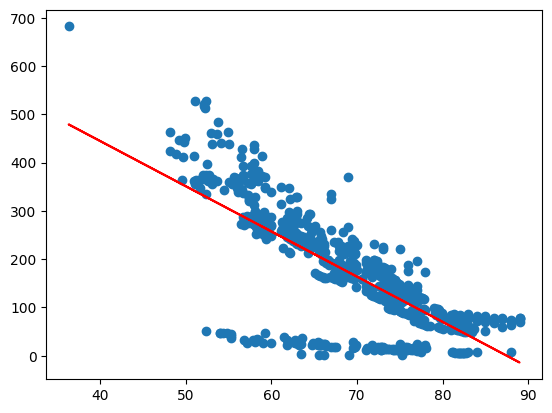

Equation:  [[-9.3562687]] x (slope) +  [818.84083967]  (intercept)
MSE:  5412.092167116396
R2:  0.560610917100975


In [ ]:
# first column
x = data2.iloc[:, 2].values.reshape(-1,1)

#second column
y = data2.iloc[:, 3].values.reshape(-1,1)

# make the model
model = LinearRegression()

# perform linear reg.
model.fit(x,y)

# make predictions
y_pred = model.predict(x)

# visualize the dataset and the reg. line

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# print it
plt.show()
print("Equation: ", model.coef_, "x (slope) + ", model.intercept_, " (intercept)")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", r2_score(y, y_pred))

Life expectancy vs. alcohol consumption

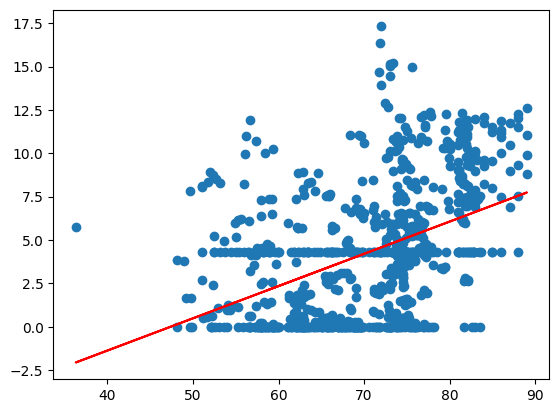

Equation:  [[0.18590948]] x (slope) +  [-8.81110391]  (intercept)
MSE:  11.587154134800956
R2:  0.19047168381473523


In [ ]:
# first column
x = data2.iloc[:, 2].values.reshape(-1,1)

#second column
y = data2.iloc[:, 4].values.reshape(-1,1)

# make the model
model = LinearRegression()

# perform linear reg.
model.fit(x,y)

# make predictions
y_pred = model.predict(x)

# visualize the dataset and the reg. line

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# print it
plt.show()
print("Equation: ", model.coef_, "x (slope) + ", model.intercept_, " (intercept)")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", r2_score(y, y_pred))

Life expectancy vs. percentage expenditure

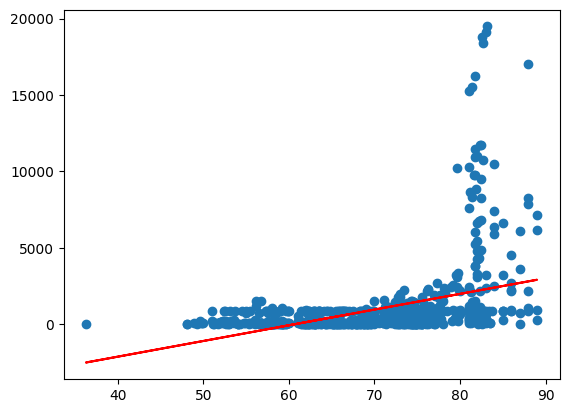

Equation:  [[102.71410995]] x (slope) +  [-6234.15790918]  (intercept)
MSE:  4578898.031579831
R2:  0.15379641261911337


In [ ]:
# first column
x = data2.iloc[:, 2].values.reshape(-1,1)

#second column
y = data2.iloc[:, 5].values.reshape(-1,1)

# make the model
model = LinearRegression()

# perform linear reg.
model.fit(x,y)

# make predictions
y_pred = model.predict(x)

# visualize the dataset and the reg. line

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# print it
plt.show()
print("Equation: ", model.coef_, "x (slope) + ", model.intercept_, " (intercept)")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", r2_score(y, y_pred))

Life expectancy vs. obesity

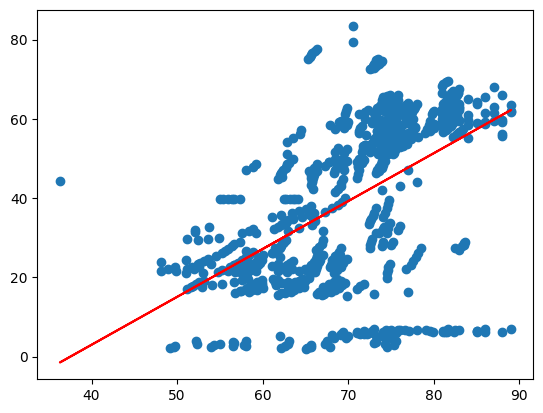

Equation:  [[1.2087399]] x (slope) +  [-45.38344394]  (intercept)
MSE:  308.0114432181105
R2:  0.2722889128563142


In [ ]:
# first column
x = data2.iloc[:, 2].values.reshape(-1,1)

#second column
y = data2.iloc[:, 6].values.reshape(-1,1)

# make the model
model = LinearRegression()

# perform linear reg.
model.fit(x,y)

# make predictions
y_pred = model.predict(x)

# visualize the dataset and the reg. line

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# print it
plt.show()
print("Equation: ", model.coef_, "x (slope) + ", model.intercept_, " (intercept)")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", r2_score(y, y_pred))

Life expectancy vs. total expenditure

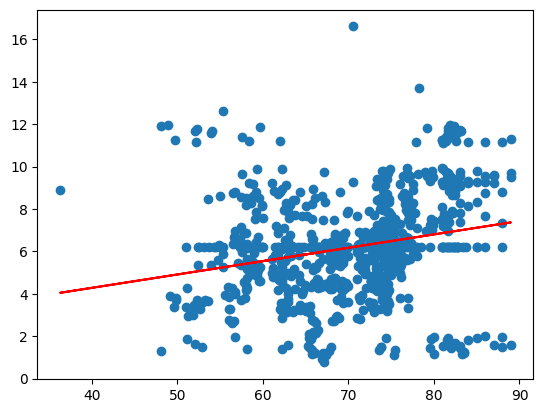

Equation:  [[0.06303169]] x (slope) +  [1.75857345]  (intercept)
MSE:  5.343926282920337
R2:  0.055396117778438225


In [ ]:
# first column
x = data2.iloc[:, 2].values.reshape(-1,1)

#second column
y = data2.iloc[:, 7].values.reshape(-1,1)

# make the model
model = LinearRegression()

# perform linear reg.
model.fit(x,y)

# make predictions
y_pred = model.predict(x)

# visualize the dataset and the reg. line

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# print it
plt.show()
print("Equation: ", model.coef_, "x (slope) + ", model.intercept_, " (intercept)")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", r2_score(y, y_pred))

Life expectancy vs. GDP

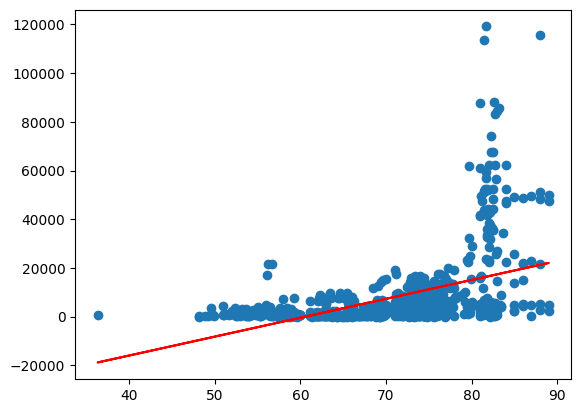

Equation:  [[775.55332019]] x (slope) +  [-46974.61393338]  (intercept)
MSE:  171244007.39977917
R2:  0.2169538651518217


In [ ]:
# first column
x = data2.iloc[:, 2].values.reshape(-1,1)

#second column
y = data2.iloc[:, 8].values.reshape(-1,1)

# make the model
model = LinearRegression()

# perform linear reg.
model.fit(x,y)

# make predictions
y_pred = model.predict(x)

# visualize the dataset and the reg. line

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# print it
plt.show()
print("Equation: ", model.coef_, "x (slope) + ", model.intercept_, " (intercept)")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", r2_score(y, y_pred))

Life expectancy vs. population

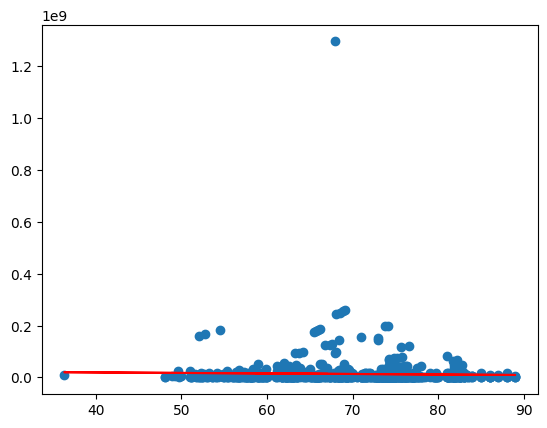

Equation:  [[-202080.74533378]] x (slope) +  [27606096.091389]  (intercept)
MSE:  2869075977553919.5
R2:  0.0011214827423697837


In [ ]:
# first column
x = data2.iloc[:, 2].values.reshape(-1,1)

#second column
y = data2.iloc[:, 9].values.reshape(-1,1)

# make the model
model = LinearRegression()

# perform linear reg.
model.fit(x,y)

# make predictions
y_pred = model.predict(x)

# visualize the dataset and the reg. line

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# print it
plt.show()
print("Equation: ", model.coef_, "x (slope) + ", model.intercept_, " (intercept)")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", r2_score(y, y_pred))

Life expectancy vs. schooling

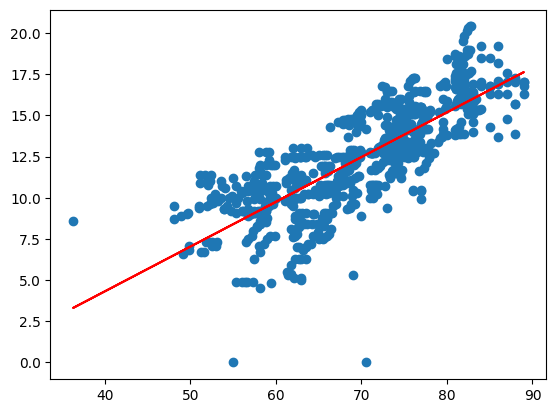

Equation:  [[0.27182618]] x (slope) +  [-6.55942373]  (intercept)
MSE:  3.3776589788116405
R2:  0.6331076250782532


In [ ]:
# first column
x = data2.iloc[:, 2].values.reshape(-1,1)

#second column
y = data2.iloc[:, 10].values.reshape(-1,1)

# make the model
model = LinearRegression()

# perform linear reg.
model.fit(x,y)

# make predictions
y_pred = model.predict(x)

# visualize the dataset and the reg. line

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# print it
plt.show()
print("Equation: ", model.coef_, "x (slope) + ", model.intercept_, " (intercept)")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", r2_score(y, y_pred))

Life expectancy vs. schooling has the lowest MSE of any of the models and has a better association between its regression line and the scatter plot, making it the best model.